Используя тестовые данные рассчитайте 5 метрик. Для каждой метрики:
- Посчитайте среднее

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../H1/new_dataframe.csv')
df.head()

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
0,0,867689,12,iOS,business,no surge,1,1,1,1,0,0,7.982135,20,low
1,1,752172,5,Android,economy,no surge,1,1,1,1,0,1,2.908468,27,high
2,2,486559,15,Android,comfort,no surge,1,1,1,1,0,0,7.224614,21,high
3,3,304024,0,Android,economy,no surge,1,1,1,1,0,1,1.874349,52,low
4,4,139420,0,Android,business,no surge,1,1,1,1,0,0,10.704778,19,low


In [2]:
# В питоне огромный кусок этого задания по сути выполняется вот так
df.describe()

,Unnamed: 0,user_id,hour,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age
count,101500.000000,101500.000000,101500.000000,101500.0,101500.000000,101500.000000,101500.000000,101500.000000,101500.000000,91431.000000,101500.000000
mean,50749.500000,549874.802207,11.481429,1.0,0.900798,0.731389,0.620365,0.111025,0.571675,5.371152,25.906384
std,29300.670499,258600.104176,6.917522,0.0,0.298934,0.443239,0.485299,0.314164,0.494838,4.118531,7.838328
min,0.000000,100093.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.010946,18.000000
25%,25374.750000,328223.000000,5.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,2.438335,20.000000
50%,50749.500000,548827.000000,11.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,4.279565,24.000000
75%,76124.250000,773051.000000,17.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,7.129814,29.000000
max,101499.000000,999978.000000,23.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,40.268966,69.000000


In [3]:
# Но сделаем честнее. Возьму 5 метрик, которые будут не дискретны
df_user_conversion = df.groupby(['user_id', 'os'])[['price_seen', 'ride_completed']].sum(numeric_only=True).copy()
df_user_conversion['conversion'] = df_user_conversion['ride_completed'] / df_user_conversion['price_seen']
df_cancel = df.groupby(['user_id', 'os'])[['order_made', 'user_cancelled']].sum(numeric_only=True).copy()
df_cancel['cancel'] = df_cancel['user_cancelled'] / df_cancel['order_made']

In [4]:
print('Среднее значение расстояния = {:.1f}'.format(df['distance'].mean()))
print('Среднее значение возраста = {:.1f}'.format(df['age'].mean()))
print('Среднее значение часа = {:.1f}'.format(df['hour'].mean()))
print('Поюзерное среднее значение успешной поездки пользователя после увиденной цены = {:.1f}'.format(df_user_conversion['conversion'].mean() * 100,'%'))
print('Поюзерное среднее значение отказа уже после сдеанного заказа = {:.1f}'.format(df_cancel['cancel'].mean() * 100,'%'))

Среднее значение расстояния = 5.4
Среднее значение возраста = 25.9
Среднее значение часа = 11.5
Поюзерное среднее значение успешной поездки пользователя после увиденной цены = 69.4
Поюзерное среднее значение отказа уже после сдеанного заказа = 15.0


- Посчитайте медиану

In [5]:
print('Медианное значение расстояния = {:.1f}'.format(df['distance'].median()))
print('Медианное значение возраста = {:.1f}'.format(df['age'].median()))
print('Медианное значение часа = {:.1f}'.format(df['hour'].median()))
print('Поюзерное медианное значение успешной поездки пользователя после увиденной цены = {:.1f}'.format(df_user_conversion['conversion'].median() * 100,'%'))
print('Поюзерное медианное значение отказа уже после сдеанного заказа = {:.1f}'.format(df_cancel['cancel'].median() * 100,'%'))

Медианное значение расстояния = 4.3
Медианное значение возраста = 24.0
Медианное значение часа = 11.0
Поюзерное медианное значение успешной поездки пользователя после увиденной цены = 80.0
Поюзерное медианное значение отказа уже после сдеанного заказа = 0.0


- Посчитайте 95-персентиль

In [6]:
print('95 персентиль расстояния = {:.1f}'.format(df['distance'].quantile(0.95)))
print('95 персентиль возраста = {:.1f}'.format(df['age'].quantile(0.95)))
print('95 персентиль часа = {:.1f}'.format(df['hour'].quantile(0.95)))
print('95 персентиль успешной поездки пользователя после увиденной цены = {:.1f}'.format(df_user_conversion['conversion'].quantile(0.95) * 100,'%'))
print('95 персентиль отказа уже после сдеанного заказа = {:.1f}'.format(df_cancel['cancel'].quantile(0.95) * 100,'%'))

95 персентиль расстояния = 13.7
95 персентиль возраста = 42.0
95 персентиль часа = 22.0
95 персентиль успешной поездки пользователя после увиденной цены = 100.0
95 персентиль отказа уже после сдеанного заказа = 100.0


- Визуализируйте распределение частотным графиком и “ящиком с усами”.

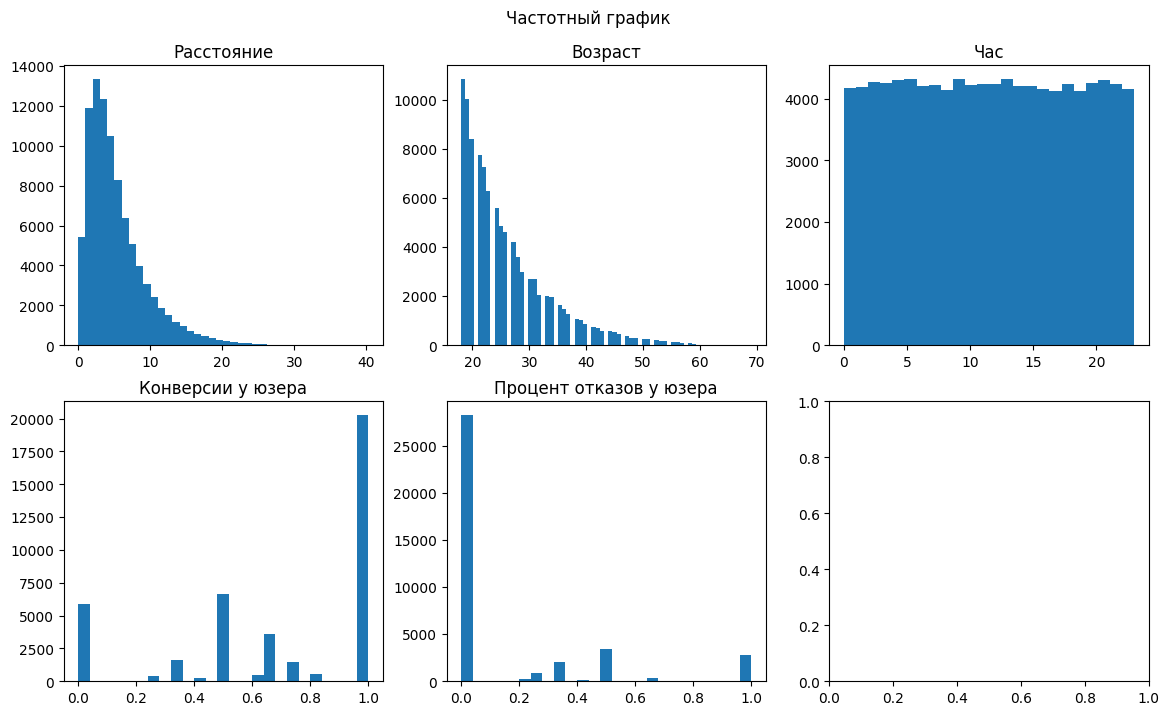

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

fig.suptitle('Частотный график', y = 0.95)

axes[0,0].hist(df['distance'], bins=int(max(df['distance'])))
axes[0,0].set_title('Расстояние')
axes[0,1].hist(df['age'], bins=int(max(df['age'])))
axes[0,1].set_title('Возраст')
axes[0,2].hist(df['hour'], bins=24)
axes[0,2].set_title('Час')
axes[1,0].hist(df_user_conversion['conversion'], bins=25)
axes[1,0].set_title('Конверсии у юзера')
axes[1,1].hist(df_cancel['cancel'], bins=25)
axes[1,1].set_title('Процент отказов у юзера')

plt.show()

**Анализ гистограмм**
<br>
- График расстояния показывает,что чаще всего поездки осуществляются по маршрутам менее 10 км. Данная метрика имеет перекошенное распределение с тяжелым хвостом. График близок по форме к распределению Фишера, или хи-квадрат. Но нужно более детально погрузиться в вопрос чтобы понять какое именно распределение это. На данный момент можно сказать лишь что это перекошенное распределение с тяжелым хвостом
- График возраста показывает, что бОльшая часть людей использующих приложение имеет возраст 21 и младше. Эта метрика имеет такое же распределение, как и предыдущая, перекошенное распределение с тяжелым хвостом, но, поскольку у нас вовсе нет левой части я бы скорее охарактеризовал его как экспоненциальное распределение. Это подразумевает, что мы имеем сильный пик в самом начале графика, постепенно убывающий при увеличении характеристики
- График времени является дискретной величиной в нашем случае, поскольку деление происходит на часы и есть всего 24 возможных значения. Следовательно это биноминальное распределение. Притом, несмотря на метрики среднего и медианы мы видим, что данная метрика распределена практически равномерно
- Конверсии у юзеров имеют мультимодальное распределние. Что подразумевает, что у них есть один большой пик и несколько маленьких. Что подразумевает несколько групп юзеров. Есть юзеры, ни разу не отказавшиеся от поездки. Также есть юзеры, которые отказывались от половины поездок и часть не отказывалась никогда. Само собой есть промежуточные значения, но в наших данных это основные группы
- Процент отказов у юзеров также имеет мультимодальное распределение с такими же характеристиками, что и у предыдущего показателя

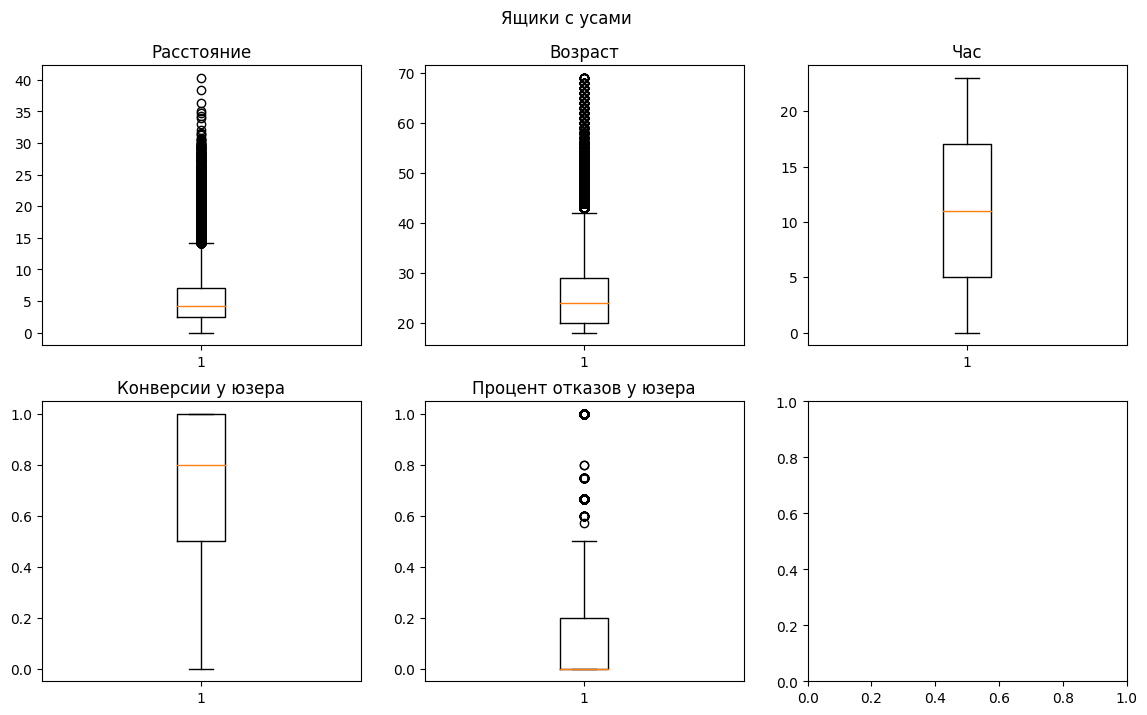

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

fig.suptitle('Ящики с усами', y = 0.95)

axes[0,0].boxplot(df['distance'].dropna())
axes[0,0].set_title('Расстояние')
axes[0,1].boxplot(df['age'])
axes[0,1].set_title('Возраст')
axes[0,2].boxplot(df['hour'])
axes[0,2].set_title('Час')
axes[1,0].boxplot(df_user_conversion['conversion'].dropna())
axes[1,0].set_title('Конверсии у юзера')
axes[1,1].boxplot(df_cancel['cancel'].dropna())
axes[1,1].set_title('Процент отказов у юзера')

plt.show()

**Анализ боксплотов**
<br>
- График расстояния показывает, 95% поездок находится в пределах до 15 км. Все остальное было воспринято как выбросы. Медиана находится около 5 км, а выбросы сверху - это более далекие поездки. 75% значений производится примерно до 8 км. Выбросов в нижней части бокса нет, 50% значений находятся между 2.5 и 8 км.
- График возраста показывает, что 95% входов в приложение приходится на пользователей между 18 (это наша нижняя граница для регистрации) и 43 годами. притом 75% входов совершается людьми младше 30 лет. А 50% всех входов производится юзерами между 20 и 30 годами.
- По графику времени видна абсолютная равномерность. Медиана почти на 12 часах, в середине. Ни одного выброса, захватывается все пространство. Верхний квартиль находится идеально на 3/4, 18 часах, в целом квартили практически идеально делят график на 4 части. Есть очень легкий наклон в сторону начала дня, но он минимален и практически воспринимается как ошибка.
- График конверсий юзеров показывает, что в целом выбросы отсутствуют. Притом более 25% находится в значении 1 или экстремально близких к нему. Медиана находится на 0.8, а 0.25 квантиль находится в середине графика, на значении 0.5, то есть только 25% юзеров конвертируются в деньги менее половины раз после увиденной цены.
- Процент отказов же и вовсе имеет более 50% значений в нуле. Что подразумевает, что отказы совершают только около 50% юзеров. 25% из них отказывается 20% раз и менее. Только 5% от всех юзеров отказывается от более чем половины поездок, что соответствует "усу" коробки, отмечающему 0.95 квантиль